In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [2]:
# Load data from JSON file
file_path = 'C:/Users/HP/Desktop/angles_output_3.json'
data = []
with open(file_path) as f:
    for line in f:
        data.append(json.loads(line))


In [3]:
# Convert JSON data to DataFrame
df = pd.DataFrame(data)

In [4]:
# Separate features and labels
X = df.drop('Label', axis=1).values
y = df['Label'].values

In [5]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [7]:
# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [21]:
# Simplify LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(35))  # Reduced from 50 to 25 units
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [22]:
# Compile model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3259 - loss: 1.5520 - val_accuracy: 0.4074 - val_loss: 1.4683
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4188 - loss: 1.4207 - val_accuracy: 0.4603 - val_loss: 1.3937
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4796 - loss: 1.3218 - val_accuracy: 0.5556 - val_loss: 1.2826
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5801 - loss: 1.2298 - val_accuracy: 0.6190 - val_loss: 1.2094
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5936 - loss: 1.1529 - val_accuracy: 0.6667 - val_loss: 1.1518
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 1.0771 - val_accuracy: 0.6402 - val_loss: 1.0966
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6453 - loss: 1.0635 - val_accuracy: 0.6667 - val_loss: 1.0471
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.9904 - val_accuracy: 0.6984 - val_loss:

In [24]:
# Save the training history
with open('simplified_training_history.json', 'w') as f:
    json.dump(lstm_history.history, f)

In [25]:
# Save simplified LSTM model
lstm_model.save('simplified_verification_model.h5')

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Predict on the test set
y_pred = lstm_model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1) 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [28]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

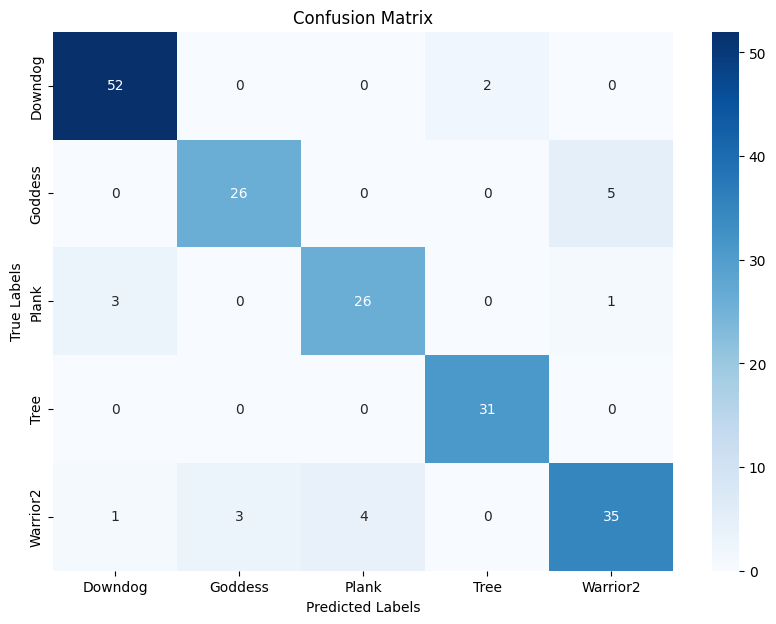

In [29]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

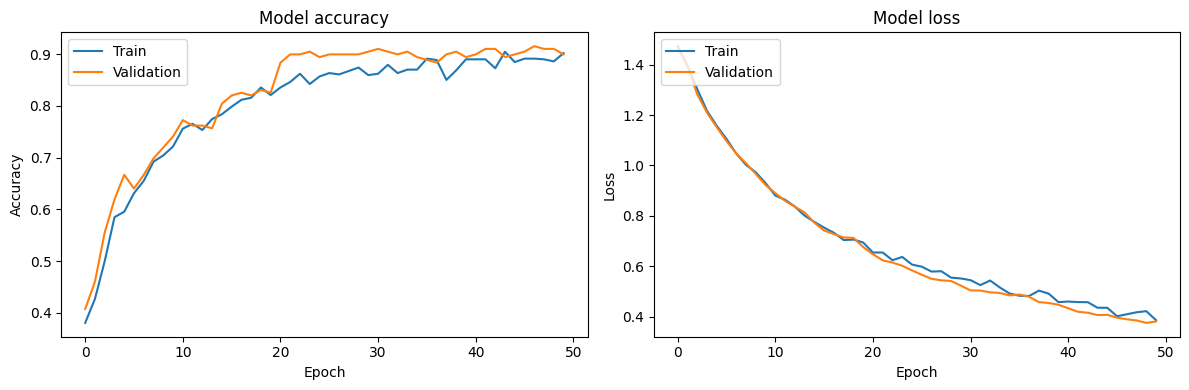

In [30]:
import matplotlib.pyplot as plt

# Extract training history
history = lstm_history.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()